## Pytorch Linear Regression
- Data was generated using Spotify Offical API and is available:
https://www.kaggle.com/datasets/yasserh/song-popularity-dataset/

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
import sklearn
from sklearn.model_selection import train_test_split
from torch import nn

In [2]:
songPopularity = pd.read_csv("data/song_data.csv")

In [ ]:
songPopularity.head(10)

In [3]:
# Prepare features
features = ['song_duration_ms', 
            'acousticness', 'danceability', 
            'energy', 'instrumentalness', 
            'key', 'liveness', 'loudness', 
            'audio_mode', 'speechiness', 
            'tempo', 'time_signature', 'audio_valence']

target = 'song_popularity'

songPopularityFeatures = songPopularity[features]
songPopularityTarget = songPopularity[target]

In [4]:
# Utilize train_test_split from sklearn to split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(songPopularityFeatures, songPopularityTarget, test_size = 0.2)

In [5]:
# Convert DataFrames into PyTorch tensors
def dataframe_to_tensor(df):
    return torch.tensor(df.values, dtype=torch.float32)

# Transform DataFrames into PyTorch tensors using the function
X_train = dataframe_to_tensor(X_train)
X_test = dataframe_to_tensor(X_test)
y_train = dataframe_to_tensor(y_train)
y_test = dataframe_to_tensor(y_test)

In [ ]:
# Visualize X_train
X_train

In [14]:
# Create first torch.nn.LinearRegression model

class LinearRegressionModel(nn.Module):
    '''
    Torch Module class.
    Initializes weight randomly and gets trained via train method.
    '''
    def __init__(self, optimizer):
        super().__init__()
        self.optimizer = optimizer

        # Initialize Weights and Bias
        self.weights = nn.Parameter(
            torch.randn(1, 13, dtype=torch.float),
            requires_grad=True)

        self.bias = nn.Parameter(
            torch.randn(1, 13, dtype=torch.float),
            requires_grad=True
            )
        
    # Goal is to optimize the weights using the optimizer (backpropagation)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
            return (self.weights * x + self.bias).sum(axis=1)
        
    # Create trainModel Method to perform backpropogation
    # and weight adjustment for optimization
    def trainModel(
            self,
            epochs: int,
            X_train: torch.Tensor,
            X_test: torch.Tensor,
            y_train: torch.Tensor,
            y_test: torch.Tensor,
            lr: float
            ):
        '''
        Trains linear model using pytorch.
        Evaluates the model against test set for every epoch.
        '''
        torch.manual_seed(42)
        # Create empty loss lists to track values
        self.train_loss_values = []
        self.test_loss_values = []

        loss_fn = nn.L1Loss()

        if self.optimizer == 'SGD':
            optimizer = torch.optim.SGD(
                params=self.parameters(),
                lr=lr
                )
        elif self.optimizer == 'Adam':
            optimizer = torch.optim.Adam(
                params=self.parameters(),
                lr=lr
                )

        for epoch in range(epochs):
            self.train()
            y_pred = self(X_train)
            loss = loss_fn(y_pred, y_train)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Set the model in evaluation mode
            self.eval()
            with torch.inference_mode():
                self.evaluate(X_test, y_test, epoch, loss_fn, loss)
                
    def evaluate(self, X_test, y_test, epoch_nb, loss_fn, train_loss):
        '''
        Evaluates current epoch performance on the test set.
        '''
        test_pred = self(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        if epoch_nb % 10 == 0:
            self.train_loss_values.append(train_loss.detach().numpy())
            self.test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch_nb} - MAE Train Loss: {train_loss} - MAE Test Loss: {test_loss} ")
    
    def plot_loss(self):
        '''
        Plots train and test loss.
        '''
        plt.plot(self.train_loss_values, label='Train Loss')
        plt.plot(self.test_loss_values, label='Test Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

Epoch: 0 - MAE Train Loss: 73563.203125 - MAE Test Loss: 72988.5546875 
Epoch: 10 - MAE Train Loss: 71377.4453125 - MAE Test Loss: 70813.3984375 
Epoch: 20 - MAE Train Loss: 69191.703125 - MAE Test Loss: 68638.2578125 
Epoch: 30 - MAE Train Loss: 67005.9609375 - MAE Test Loss: 66463.1015625 
Epoch: 40 - MAE Train Loss: 64820.2109375 - MAE Test Loss: 64287.95703125 
Epoch: 50 - MAE Train Loss: 62634.46484375 - MAE Test Loss: 62112.81640625 
Epoch: 60 - MAE Train Loss: 60448.72265625 - MAE Test Loss: 59937.66796875 
Epoch: 70 - MAE Train Loss: 58262.97265625 - MAE Test Loss: 57762.5234375 
Epoch: 80 - MAE Train Loss: 56077.23046875 - MAE Test Loss: 55587.3671875 
Epoch: 90 - MAE Train Loss: 53891.47265625 - MAE Test Loss: 53412.203125 
Epoch: 100 - MAE Train Loss: 51705.6953125 - MAE Test Loss: 51237.02734375 
Epoch: 110 - MAE Train Loss: 49519.91015625 - MAE Test Loss: 49061.84375 
Epoch: 120 - MAE Train Loss: 47334.1328125 - MAE Test Loss: 46886.66796875 
Epoch: 130 - MAE Train Loss: 4

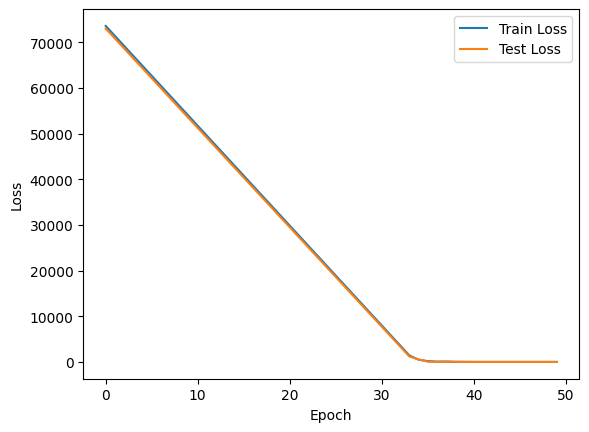

In [17]:
# Train model using Adam optimizer and 0.001 learning rate
adam_model = LinearRegressionModel('Adam')

adam_model.trainModel(500, X_train, X_test, y_train, y_test, 0.001)
adam_model.plot_loss()

Epoch: 0 - MAE Train Loss: 73563.203125 - MAE Test Loss: 47404136.0 
Epoch: 10 - MAE Train Loss: 73563.2109375 - MAE Test Loss: 47404136.0 
Epoch: 20 - MAE Train Loss: 73563.2109375 - MAE Test Loss: 47404136.0 
Epoch: 30 - MAE Train Loss: 73563.2109375 - MAE Test Loss: 47404136.0 
Epoch: 40 - MAE Train Loss: 73563.2109375 - MAE Test Loss: 47404136.0 
Epoch: 50 - MAE Train Loss: 73563.2109375 - MAE Test Loss: 47404136.0 
Epoch: 60 - MAE Train Loss: 73563.2109375 - MAE Test Loss: 47404136.0 
Epoch: 70 - MAE Train Loss: 73563.2109375 - MAE Test Loss: 47404136.0 
Epoch: 80 - MAE Train Loss: 73563.2109375 - MAE Test Loss: 47404136.0 
Epoch: 90 - MAE Train Loss: 73563.2109375 - MAE Test Loss: 47404136.0 
Epoch: 100 - MAE Train Loss: 73563.2109375 - MAE Test Loss: 47404136.0 
Epoch: 110 - MAE Train Loss: 73563.2109375 - MAE Test Loss: 47404136.0 
Epoch: 120 - MAE Train Loss: 73563.2109375 - MAE Test Loss: 47404136.0 
Epoch: 130 - MAE Train Loss: 73563.2109375 - MAE Test Loss: 47404136.0 
Epoc

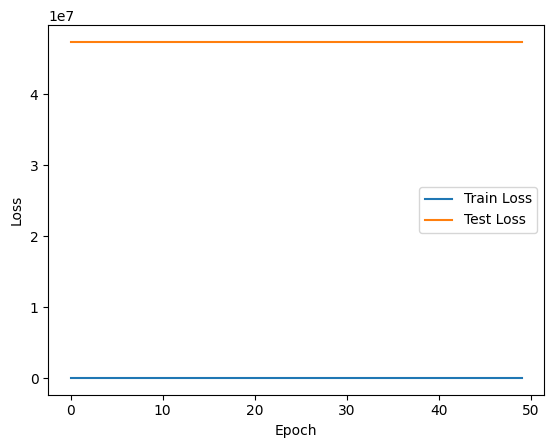

In [16]:
# Now use Stochastic Gradient Descent (SGD) optimizer with 0.001 learning rate
# Notice that the MAE does not improve. SGD is very sensitive to features and could be optimized by feature scaling
sgd_model = LinearRegressionModel('SGD')
sgd_model.trainModel(500, X_train, X_test, y_train, y_test, 0.001) 
sgd_model.plot_loss()